In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [36]:
# membaca data dari data set
def Read_Data(filename):
    dataset = pd.read_excel(filename)
    print('Dataset')
    print(dataset)
    df = DataFrame(dataset)
    # membuat list dari dataset
    list_dataset = df.values.tolist()
    return list_dataset

In [37]:
# fungsi Euclidian Distance untuk menghitung jarak antar data 
def Euclidian_Distance(data1, data2):
    euclid_dist = 0.0
    for i in range (len(data1) - 1):
        euclid_dist += (data1[i] - data2[i]) ** 2
    return sqrt(euclid_dist)

In [38]:
# mencari tetangga point P pada dataset dalam batasan epsilon 
def Neighbors_P(dataset, p, eps):
    # inisialisasi awal tetangga point P
    neighbors = []
    # mengitung jarak point P dengan seluruh dataset
    for data in range(len(dataset) - 1):
        dist = Euclidian_Distance(dataset[p], dataset[data])
        # jika jarak antar point dan data < eps, maka masukkan data dalam neighbors[]
        if dist < eps:
            neighbors.append(data)
    return neighbors

In [39]:
# memperluas cluster dari neighbors
def Expand_Cluster(dataset, status, p, p_neighbors, cluster, eps, minPts):
    # tandai p sebagai cluster
    status[p] = cluster
    i = 0
    # mencari tetangga dari masing-masing p_neighbors
    while i < len(p_neighbors):
        p_n = p_neighbors[i]
        # jika status dari p_n tersebut -1, maka masukkan sebagai cluster
        if status[p_n] == -1:
            status[p_n] = cluster
        # jika status p_n masih 0 (belum ada status), tandai dulu sebagai cluster, lalu cari tetangganya
        elif status[p_n] == 0:
            status[p_n] = cluster
            # mencari tetangga dari p_n
            p_n_neighbors = Neighbors_P(dataset, p_n, eps)
            # jika jumlah p_n_neighbors memenuhi minPts dan eps, maka tambahkan jumlah p_neighbors awal dengan                       # p_n_neighbors
            p_neighbors = p_neighbors + p_n_neighbors
        i += 1

In [40]:
def DBSCAN(dataset, eps, minPts):
    # inisialisasi status tiap point pada dataset
    status = [0] * len(dataset)
    # inisialisasi cluster
    cluster = 0

    for p in range(len(dataset)):
        # data yang akan diproses adalah data dengan status 0
        # jika status pada suatu point != 0, maka cari point selanjutnya
        if not (status[p] == 0):
            continue
        # mencari tetangga point P dalam batas eps
        p_neighbors = Neighbors_P(dataset, p, eps)
        # mengecek apakah point-point yang masuk dalam neighbors (pada jarak eps) memenuhi minPts
        if len(p_neighbors) >= minPts:
            cluster += 1
            # cari perluasan cluster
            Expand_Cluster(dataset, status, p, p_neighbors, cluster, eps, minPts)
        else:
            # definisikan sebagai outlier
            status[p] = -1
    return status

In [41]:
def run() :
    filename = 'dataset.xlsx'
    dataset = Read_Data(filename)
    print('')
    print('List Dataset')
    print('')
    print(dataset)
    print('')

    # inisialisasi eps dan minPts
    eps = 4.0
    minPts = 5
    status = DBSCAN(dataset, eps, minPts)
    print('Cluster')
    print('')
    print(status)
    print('')

    # do ploting
    dt = np.matrix(dataset)
    x = (dt[:,0]).tolist()
    y = (dt[:,1]).tolist()
    colors = ['yellow','blue', 'red', 'green']
    vectorizer = np.vectorize(lambda x:colors[x % len(colors)])
    plt.scatter(x, y, c = vectorizer(status))
    plt.show()

Dataset
     x   y
0    2   2
1    2   3
2    4   3
3    1   4
4    6   4
5    3   5
6    4   6
7    2   8
8    4   7
9    5   9
10   3   9
11   1  10
12   3  11
13   2  12
14   5  13
15   3  14
16   4  15
17   3  16
18  14   1
19  14   3
20  15   2
21  16   3
22  15   4
23  15   5
24  15   6
25  20  11
26  20  12
27  21  12
28  22  12

List Dataset

[[2, 2], [2, 3], [4, 3], [1, 4], [6, 4], [3, 5], [4, 6], [2, 8], [4, 7], [5, 9], [3, 9], [1, 10], [3, 11], [2, 12], [5, 13], [3, 14], [4, 15], [3, 16], [14, 1], [14, 3], [15, 2], [16, 3], [15, 4], [15, 5], [15, 6], [20, 11], [20, 12], [21, 12], [22, 12]]

Cluster

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, -1, -1, -1, -1]



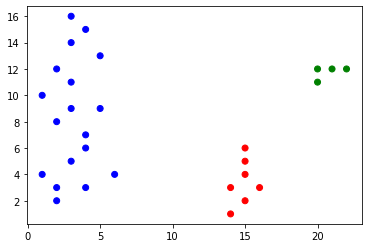

In [42]:
if __name__ == '__main__':
    run()